## Import Required Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical, pad_sequences
from keras.callbacks import EarlyStopping
%matplotlib inline

## Read Data and Do Preprocessing

In [4]:
df = pd.read_csv('./spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.shape

(5572, 2)

## Understanding the data

Text(0.5, 1.0, 'Number of ham and spam messages')

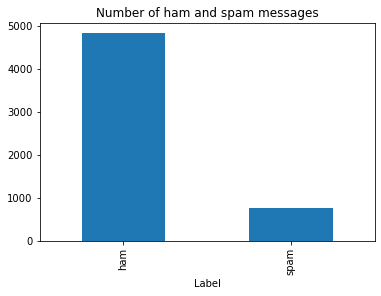

In [8]:
df['v1'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [9]:
X = df.v2
Y = df.v1

le = LabelEncoder()

Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

## Split data into train and test 

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20)

## Using Tokenizer

In [11]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = keras.utils.pad_sequences(sequences,maxlen=max_len)

## Adding Layers

In [12]:
inputs = Input(name='inputs',shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(64)(layer)
layer = Dense(256,name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1,name='out_layer')(layer)
layer = Activation('sigmoid')(layer)

## Create and Compile model

In [13]:
model = Model(inputs=inputs,outputs=layer)
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

## Train the model

In [14]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10)

Epoch 1/10
35/35 [==============================] - 12s 149ms/step - loss: 0.2825 - accuracy: 0.8995
Epoch 2/10
35/35 [==============================] - 5s 143ms/step - loss: 0.0620 - accuracy: 0.9841
Epoch 3/10
35/35 [==============================] - 5s 149ms/step - loss: 0.0406 - accuracy: 0.9883
Epoch 4/10
35/35 [==============================] - 5s 152ms/step - loss: 0.0321 - accuracy: 0.9919
Epoch 5/10
35/35 [==============================] - 5s 138ms/step - loss: 0.0235 - accuracy: 0.9939
Epoch 6/10
35/35 [==============================] - 5s 146ms/step - loss: 0.0192 - accuracy: 0.9944
Epoch 7/10
35/35 [==============================] - 6s 161ms/step - loss: 0.0160 - accuracy: 0.9953
Epoch 8/10
35/35 [==============================] - 9s 263ms/step - loss: 0.0121 - accuracy: 0.9971
Epoch 9/10
35/35 [==============================] - 9s 231ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 10/10
35/35 [==============================] - 5s 142ms/step - loss: 0.0078 - accuracy: 0.998

In [15]:
model.save('spam_lstm_model.h5')

## Testing and Evauation

In [16]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = keras.utils.pad_sequences(test_sequences,maxlen=max_len)

accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(accr[0],accr[1]))

35/35 [==============================] - 2s 27ms/step - loss: 0.0848 - accuracy: 0.9839
Test set
 Loss: 0.085
 Accuracy: 0.984
